In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [2]:
path = r'Albuquerque Home Prices_data.txt'
data = pd.read_csv(path, sep = '\t')

In [3]:
data.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [14]:
data.describe()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1062.735043,1653.854701,-4178.914530,3.529915,0.666667,0.230769,0.188034,-128.948718
std,380.436985,523.722802,4961.782238,1.405486,0.473432,0.423137,0.392420,3044.626782
min,540.000000,837.000000,-9999.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000
25%,780.000000,1280.000000,-9999.000000,3.000000,0.000000,0.000000,0.000000,553.000000
50%,960.000000,1549.000000,4.000000,4.000000,1.000000,0.000000,0.000000,701.000000
75%,1200.000000,1894.000000,15.000000,4.000000,1.000000,0.000000,0.000000,899.000000
max,2150.000000,3750.000000,53.000000,8.000000,1.000000,1.000000,1.000000,1765.000000


In [9]:
mask = data['COR'] == 1
corner_houses = data[mask]
uncorner_houses = data[mask == False]
print(corner_houses.head())
print(uncorner_houses.head())

    PRICE  SQFT  AGE  FEATS  NE  CUST  COR   TAX
17   1110  1630   15      3   1     0    1   867
18   1139  1680   17      4   1     0    1   750
23    900  1400   16      2   1     0    1   731
26   1695  2931   28      3   1     0    1  1142
30   1020  1478   53      3   1     0    1   626
   PRICE  SQFT   AGE  FEATS  NE  CUST  COR   TAX
0   2050  2650    13      7   1     1    0  1639
1   2080  2600 -9999      4   1     1    0  1088
2   2150  2664     6      5   1     1    0  1193
3   2150  2921     3      6   1     1    0  1635
4   1999  2580     4      4   1     1    0  1732


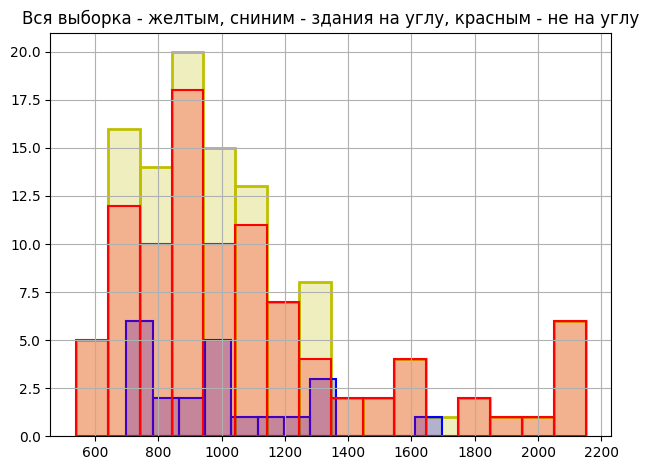

In [45]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()
# all
numberOfBins = int(1 + np.ceil(3.322 * np.log10(len(data['PRICE'])))) * 2
counts, bins = np.histogram(data['PRICE'], numberOfBins)
ax.hist(bins[:-1], bins, weights=counts, color='y', alpha=0.25, linewidth=0)
ax.grid()
ax.hist(bins[:-1], bins, weights=counts, facecolor='None', edgecolor='y', linewidth=2, alpha=1)
# corner_houses
numberOfBins = int(1 + np.ceil(3.322 * np.log10(len(corner_houses['PRICE'])))) * 2
counts, bins = np.histogram(corner_houses['PRICE'], numberOfBins)
ax.hist(bins[:-1], bins, weights=counts, color='b', alpha=0.25, linewidth=0)
ax.hist(bins[:-1], bins, weights=counts, facecolor='None', edgecolor='b', linewidth=1.5, alpha=1)
# uncorner_houses
numberOfBins = int(1 + np.ceil(3.322 * np.log10(len(uncorner_houses['PRICE'])))) * 2
counts, bins = np.histogram(uncorner_houses['PRICE'], numberOfBins)
ax.hist(bins[:-1], bins, weights=counts, color='r', alpha=0.25, linewidth=0)
ax.hist(bins[:-1], bins, weights=counts, facecolor='None', edgecolor='r', linewidth=1.5, alpha=1)
plt.title('Вся выборка - желтым, сниним - здания на углу, красным - не на углу')
plt.show()

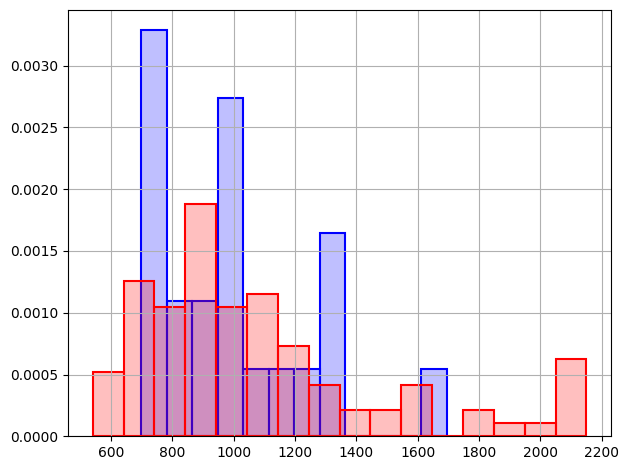

In [36]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()
# corner_houses
numberOfBins = int(1 + np.ceil(3.322 * np.log10(len(corner_houses['PRICE'])))) * 2
counts, bins = np.histogram(corner_houses['PRICE'], numberOfBins, density=True)
ax.hist(bins[:-1], bins, weights=counts, color='b', alpha=0.25, linewidth=0)
ax.grid()
ax.hist(bins[:-1], bins, weights=counts, facecolor='None', edgecolor='b', linewidth=1.5, alpha=1)
# uncorner_houses
numberOfBins = int(1 + np.ceil(3.322 * np.log10(len(uncorner_houses['PRICE'])))) * 2
counts, bins = np.histogram(uncorner_houses['PRICE'], numberOfBins, density=True)
ax.hist(bins[:-1], bins, weights=counts, color='r', alpha=0.25, linewidth=0)
ax.hist(bins[:-1], bins, weights=counts, facecolor='None', edgecolor='r', linewidth=1.5, alpha=1)
plt.show()

In [21]:
def ruleOf3std(series : pd.Series):
    std = series.std()
    mean = series.mean()
    #range = [mean - 3*std, mean + 3*std] # not usable
    mask = series < (std * 3 + mean)
    return series[mask]

In [22]:
bins = 20
counts, bins = np.histogram(ruleOf3std(data['население']), bins=bins) # ruleOf3std - правило 3 сигм, убирает из вывода переменные, выходящие за рамки правила
plt.hist(bins[:-1], bins, weights=counts)
plt.grid(True)
plt.show()

KeyError: 'население'

In [7]:
logarithmicData = np.log10(data['население'])
bins = 30
counts, bins = np.histogram(logarithmicData, bins=bins) # ruleOf3std - правило 3 сигм, убирает из вывода переменные, выходящие за рамки правила
plt.hist(bins[:-1], bins, weights=counts)
plt.grid(True)
plt.show()

KeyError: 'население'

In [7]:
logarithmicData.describe()

count    1004.000000
mean        1.319556
std         0.515877
min        -1.000000
25%         1.029384
50%         1.284429
75%         1.579495
max         3.702947
Name: население, dtype: float64

In [9]:
scipy.stats.shapiro(logarithmicData)

ShapiroResult(statistic=0.9746663570404053, pvalue=3.1486824866172602e-12)

### p-value меньше уровня значимости 0,05
## отклоняем гипотезу о нормальности прологарифмированной выборки